# Logistic Regression Project 

In this homework we will be working with a advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

## 1. Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [2]:
# Start here
ad_data = pd.read_csv('advertising.csv')

#### Check the head of ad_data

In [6]:
# Start here
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


## 2. Exploratory Data Analysis

#### Check type, missing values, categorical features

In [7]:
# Start here
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


#### Create a histogram of the Age

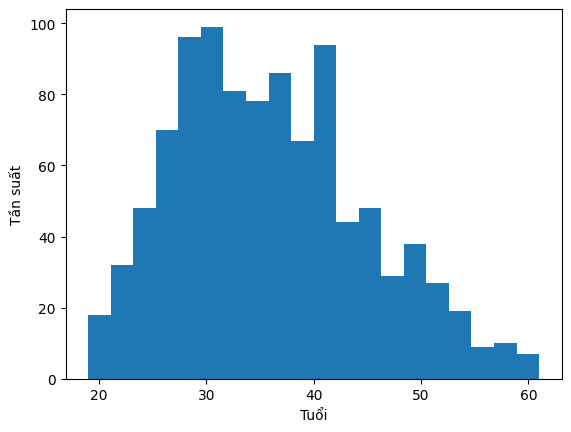

In [8]:
# Start here
plt.hist(ad_data['Age'], bins = 20)
# Khai báo tiêu đề cho trục x
plt.xlabel('Tuổi')
# Khai báo tiêu đề cho trục y
plt.ylabel('Tần suất')
plt.show()

#### Create a jointplot showing Area Income versus Age.

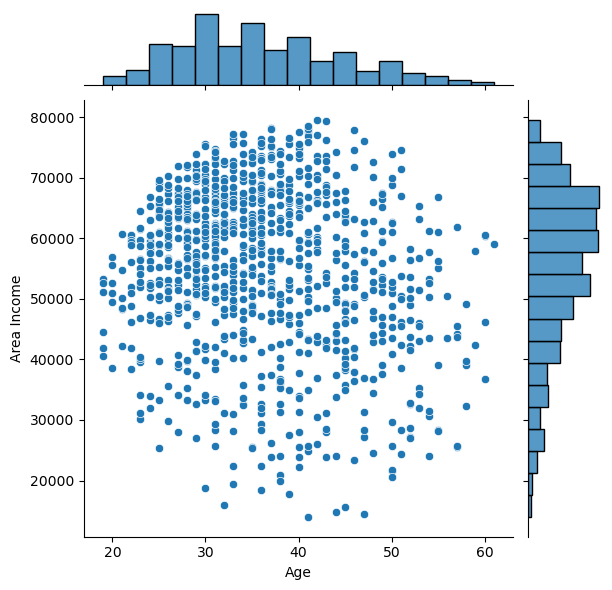

In [33]:
# Start here
sns.jointplot(x="Age", y="Area Income", data=ad_data)
plt.show()

#### Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.

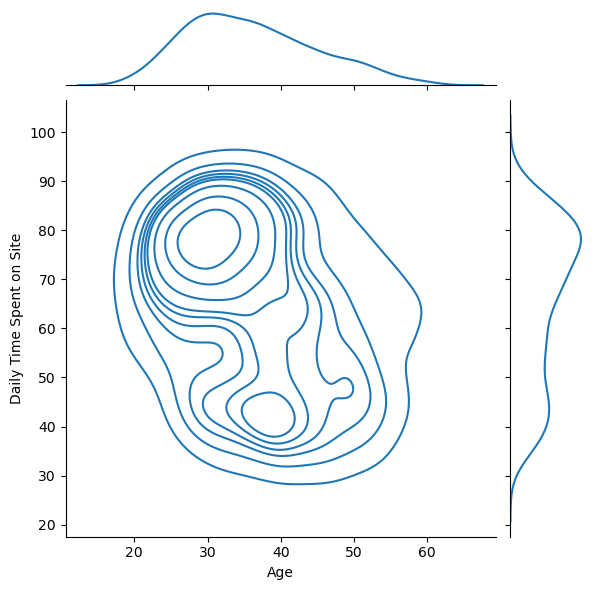

In [41]:
# Start here
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=ad_data, kind='kde')
plt.show()

#### Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'

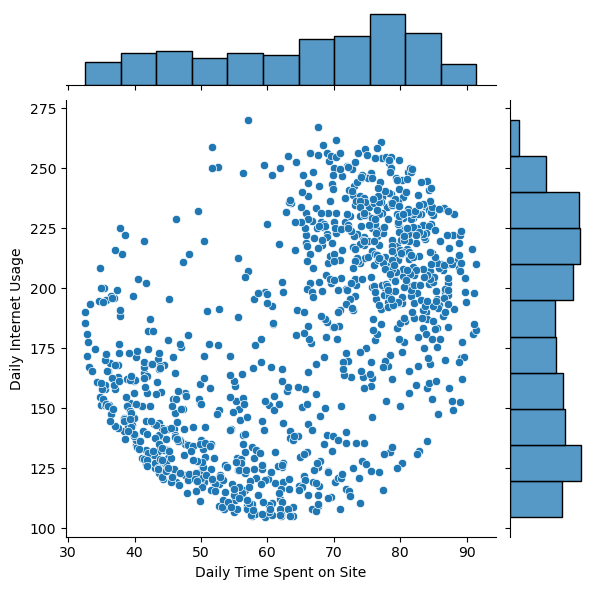

In [45]:
# Start here
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=ad_data)
plt.show()

#### Create a pairplot with the hue defined by the 'Clicked on Ad' column feature.

In [ ]:
# Start here
sns.pairplot(ad_data, hue='Clicked on Ad')
plt.show()

# 3. Data Wrangling
Anything you do to make a better model, for example, 
- what should we do with the timestamp column? (create year/day/month column ?).
- what about Country/City column ?
- ...

In [ ]:
# Start here
ad_data['Timestamp'] = pd.to_datetime(ad_data['Timestamp'])

ad_data['Year'] = ad_data['Timestamp'].dt.year
ad_data['Month'] = ad_data['Timestamp'].dt.month
ad_data['Day'] = ad_data['Timestamp'].dt.day
ad_data['Hour'] = ad_data['Timestamp'].dt.hour
ad_data['Day of Week'] = ad_data['Timestamp'].dt.dayofweek  # Monday=0, Sunday=6

# Only run 1 time because columns 'Country' and 'City' no longer exists in the DataFrame
ad_data = pd.get_dummies(ad_data, columns=['Country', 'City'], drop_first=True) 
print(ad_data.columns)


Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'Male', 'Timestamp',
       'Clicked on Ad', 'Year', 'Month',
       ...
       'City_Wintersfort', 'City_Wongland', 'City_Wrightburgh',
       'City_Wrightview', 'City_Yangside', 'City_Youngburgh', 'City_Youngfort',
       'City_Yuton', 'City_Zacharystad', 'City_Zacharyton'],
      dtype='object', length=1217)


# 4. Logistic Regression

You'll have the freedom here to choose columns that you want to train on!

In [16]:
# X = ...
# Y = ...
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
Y = ad_data['Clicked on Ad']

### 4.1. Split the data into training set (80%) and testing set (20%) using train_test_split

docs: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [17]:
# Start here
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### 4.2. Train and fit a logistic regression model on the training set

In [18]:
# Start here
model = LogisticRegression()

model.fit(X_train, Y_train)

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### 4.3. Predictions and Evaluations
Now predict values for the testing data.

In [19]:
# Start here
predictions = model.predict(X_test)

#### Calculate accuracy/recall/precision/f1 score on the testing data

In [ ]:
# Start here
# confusion_matrix: Shows the number of correct and incorrect predictions for each class.
# classification_report: Provides important summary metrics such as Precision, Recall, F1-Score, and accuracy.
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

[[ 84   5]
 [  8 103]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        89
           1       0.95      0.93      0.94       111

    accuracy                           0.94       200
   macro avg       0.93      0.94      0.93       200
weighted avg       0.94      0.94      0.94       200



## Gút chóp <img src="https://raw.githubusercontent.com/FortAwesome/Font-Awesome/6.x/svgs/regular/face-laugh-wink.svg" width="20" height="7">